<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
C:\Users\abhis\AppData\Local\Temp\ipykernel_12124\3478356417.py:13: SyntaxWarning: invalid escape sequence '\h'
  data = pd.read_csv('dataset\heart.csv')


The dataset is:
20.0
Lower Bound: 90.0
Upper Bound: 170.0
DAta without outliers
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              1        140          289          0           0   
1     49    1              2        160          180          0           0   
2     37    0              1        130          283          0           1   
3     48    1              3        138          214          0           0   
4     54    0              2        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              0        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              1        130          236          0           2   
917   38    0              2        138          17

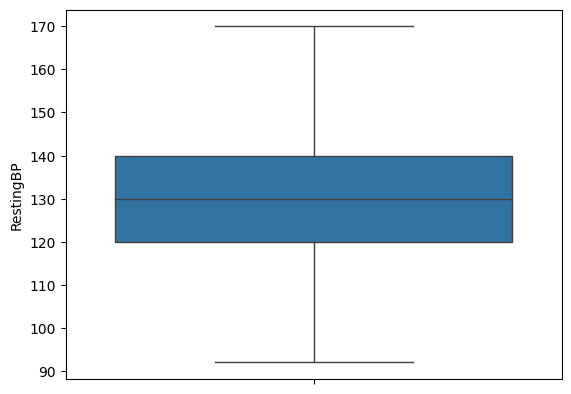

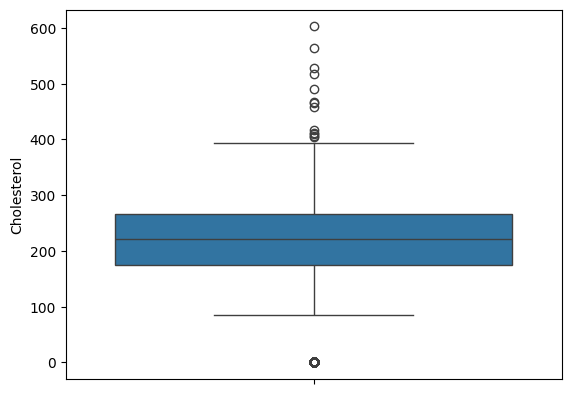

91.5
Lower Bound: 37.0
Upper Bound: 403.0
DAta without outliers
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              1        140          289          0           0   
1     49    1              2        160          180          0           0   
2     37    0              1        130          283          0           1   
3     48    1              3        138          214          0           0   
4     54    0              2        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              0        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              1        130          236          0           2   
917   38    0              2        138          175          0    

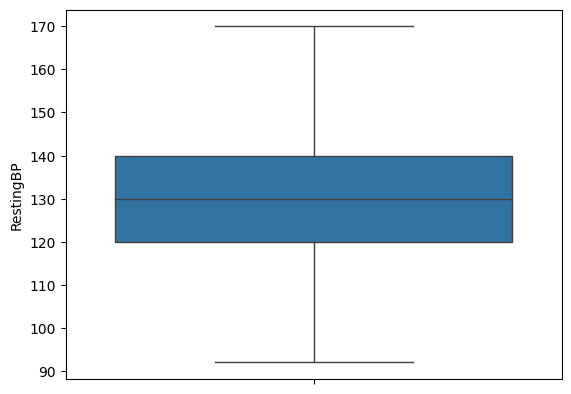

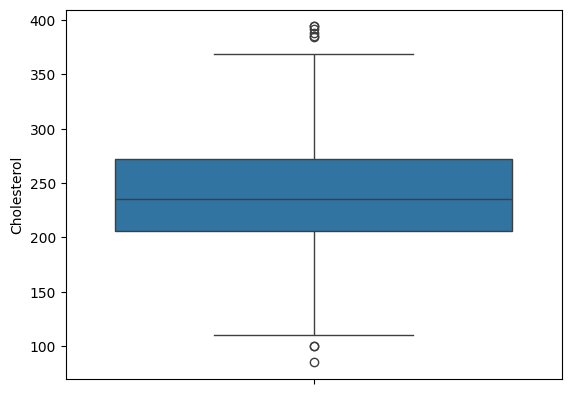

1.5
Lower Bound: -2.25
Upper Bound: 3.75
DAta without outliers
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              1        140          289          0           0   
1     49    1              2        160          180          0           0   
2     37    0              1        130          283          0           1   
3     48    1              3        138          214          0           0   
4     54    0              2        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              0        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              1        130          236          0           2   
917   38    0              2        138          175          0     

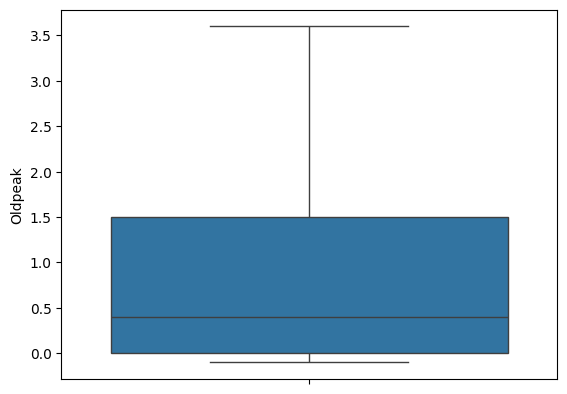

After removing the outliers


c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\abhis\AppData\Local\Temp\ipykernel_12124\3478356417.py:13: SyntaxWarning: invalid escape sequence '\h'
  data = pd.read_csv('dataset\heart.csv')


ModuleNotFoundError: No module named 'ipywidgets'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as ss
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE,VarianceThreshold
import numpy as np
from sklearn.linear_model import LogisticRegression,BayesianRidge
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('dataset\heart.csv')
df=pd.DataFrame(data)
print("The dataset is:")
df
df['Sex']=df['Sex'].map({"M":0,"F":1})
df['RestingECG']=df['RestingECG'].map({"Normal":0,"ST":1,"LVH":2})
df['ST_Slope']=df['ST_Slope'].map({"Up":2,"Flat":1,"Down":0})
df['ExerciseAngina']=df['ExerciseAngina'].map({"Y":1,"N":0})
df['ChestPainType']=df['ChestPainType'].map({"TA":0,"ATA":1,"NAP":2,"ASY":3})
   



Q1=df['RestingBP'].quantile(0.25)
Q3=df['RestingBP'].quantile(0.75)



IQR = Q3 - Q1
print(IQR)
lowerBound=Q1-1.5*IQR
upperBound=Q3+1.5*IQR

print(f'Lower Bound: {lowerBound}')
print(f'Upper Bound: {upperBound}')

filteredData=df[(df['RestingBP']>=lowerBound)&(df['RestingBP']<=upperBound)]

print("DAta without outliers")
print(filteredData)

ss.boxplot(filteredData['RestingBP'])
plt.show()
ss.boxplot(filteredData['Cholesterol'])
plt.show()


#This is for the choelsterol
Q1=filteredData['Cholesterol'].quantile(0.25)
Q3=filteredData['Cholesterol'].quantile(0.75)


IQR = Q3 - Q1
print(IQR)
lowerBound=Q1-1.5*IQR
upperBound=Q3+1.5*IQR

print(f'Lower Bound: {lowerBound}')
print(f'Upper Bound: {upperBound}')

filteredData=filteredData[(filteredData['Cholesterol']>=lowerBound)&(filteredData['Cholesterol']<=upperBound)]

print("DAta without outliers")
print(filteredData)

ss.boxplot(filteredData['RestingBP'])
plt.show()
ss.boxplot(filteredData['Cholesterol'])
plt.show()

#This is for the Old Peak

Q1=filteredData['Oldpeak'].quantile(0.25)
Q3=filteredData['Oldpeak'].quantile(0.75)


IQR = Q3 - Q1
print(IQR)
lowerBound=Q1-1.5*IQR
upperBound=Q3+1.5*IQR

print(f'Lower Bound: {lowerBound}')
print(f'Upper Bound: {upperBound}')

filteredData=filteredData[(filteredData['Oldpeak']>=lowerBound)&(filteredData['Oldpeak']<=upperBound)]

print("DAta without outliers")
print(filteredData)

ss.boxplot(filteredData['Oldpeak'])
plt.show()

print("After removing the outliers")
filteredData
#This is the EDA report before removing the outliers
from ydata_profiling import ProfileReport


profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

profile.to_notebook_iframe()

profile.to_file("before_removing_outliers.html")

#This is the EDA report after removing the outliers


profile = ProfileReport(filteredData, title="Pandas Profiling Report", explorative=True)

profile.to_notebook_iframe()

profile.to_file("after_removing_outliers.html")

In [ ]:
from sklearn.linear_model import LogisticRegression
X=filteredData.drop('HeartDisease',axis=1)
# print(X)
y=filteredData['HeartDisease']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=LogisticRegression(random_state=42,solver='liblinear')
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print("the r2 score is:",r2)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6)

model.fit(X_train,y_train)

# Instantiate the KNN model
knn = KNeighborsClassifier()


r2=r2_score(y_test,y_pred)
y_pred=model.predict(X_test)
print("the r2 score is:",r2)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=50,random_state=42)

model.fit(X_train,y_train)

r2=r2_score(y_test,y_pred)
y_pred=model.predict(X_test)
print("the r2 score is:",r2)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,HistGradientBoostingClassifier

X=filteredData.drop('HeartDisease',axis=1)
y=filteredData['HeartDisease']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# param_distributions = {
#     'n_estimators':[i for i in range(100,1000)],  # Number of trees in the forest
#     'max_depth': [i for i in range(10,100)],       # Maximum depth of the tree
#     'min_samples_split': [i for i in range(2,20)], # Minimum number of samples required to split a node
#     'min_samples_leaf': [i for i in range(1,20)],  # Minimum number of samples required at a leaf node
#     'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
#     'bootstrap': [True, False],          # Whether bootstrap samples are used when building trees
#     'criterion': ['gini', 'entropy'],    # Function to measure the quality of a split
# }

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# model=GradientBoostingClassifier(loss='exponential',learning_rate=0.3,n_estimators=50,max_depth=3)
model=RandomForestClassifier(n_estimators= 300, min_samples_split= 11,
                             min_samples_leaf= 1, max_features= 'log2', max_depth=20,criterion='entropy',bootstrap=True,random_state=42)
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
#                                    n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_
# print("Best parameters found: ", best_params)
# print(f"best score is:{random_search.best_score_}")
model.fit(X_train,y_train)

# scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# # Print the scores for each fold
# print("Cross-validation scores:", scores)
# print("Mean accuracy:", scores.mean())
# print("Standard deviation:", scores.std())


y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print("R2:",r2)
print(f"Accuracy is:{accuracy_score(y_test,y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")